## TP 1
### Objetivo
El objetivo del primer TP es realizar un análisis exploratorio del set de datos del TP. Queremos ver qué cosas podemos descubrir sobre los datos que puedan resultar interesantes. Los requisitos de la primera entrega son los siguientes:

 - El análisis debe estar hecho en Python Pandas o R.
 - El análisis debe entregarse en formato papel en una carpeta en donde se incluya el reporte completo y todas las visualizaciones generadas. Es altamente recomendable que las visualizaciones se impriman en color.
 - Informar el link a un repositorio Github en donde pueda bajarse el código completo para generar el análisis.
 - Agregar en Kaggle un kernel con el análisis exploratorio realizado.
 
### Evaluación

 - Originalidad del análisis exploratorio. 
 - Calidad del reporte. ¿Está bien escrito? ¿Es claro y preciso? 
 - Calidad del análisis exploratorio: qué tipo de preguntas se hacen y de qué forma se responden, ¿es la respuesta clara y concisa con respecto a la pregunta formulada? 
 #### Calidad de las visualizaciones presentadas.
 - ¿Tienen todos los ejes su rótulo?
 - ¿Tiene cada visualización un título?
 - ¿Es entendible la visualización sin tener que leer la explicación?
 - ¿El tipo de plot elegido es adecuado para lo que se quiere visualizar?
 - ¿Es una visualización interesante?
 - ¿El uso del color es adecuado?
 - ¿Hay un exceso o falta de elementos visuales en la visualización elegida?
 - ¿La visualización es consistente con los datos?
#### Conclusiones presentadas.
 - ¿Presenta el grupo un listado de "insights" aprendidos sobre los datos en base al análisis realizado? ¿Es interesante?
 - ¿Pudieron descubrir features en el campo ‘model’? ¿Cuales fueron?
 - ¿Identificaron patrones o funnels de usuarios que realizan checkouts/conversiones en Trocafone? 
 - ¿Se comportan de forma distinta dependiendo del tipo de dispositivo desde el cual acceden?
 - ¿Se comportan de forma distinta dependiendo del tipo de fuente de tráfico al que pertenecen?
 - ¿Realizaron algún análisis sobre búsquedas que realizan los usuarios y las keywords que utilizan apoyándose en algún tipo de visualización?
 - ¿Realizaron algún análisis de lugar donde se originan las visitas de los usuarios de Trocafone (a nivel país, regiones más importantes o ciudades más importantes) apoyándose en algún tipo de visualización?
 - ¿Pudieron descubrir features jerarquizando información de alguno de los campos (por ejemplo “screen_resolution”)?
 - ¿El análisis realiza un aporte a Trocafone?




In [3]:
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-darkgrid')
sns.set(rc={'figure.figsize':(15.7,10.27)})

In [4]:
#Cargo los datos en memoria
eventos = pd.read_csv('fiuba-trocafone-tp1-final-set/events.csv', low_memory=False)
eventos['timestamp'] =  pd.to_datetime(eventos['timestamp'])
eventos[['marca','modelo']] = eventos['model'].dropna().str.split(' ',n=1,expand=True)
eventos['weekday']=eventos['timestamp'].apply(lambda x: x.day_name())
eventos['hour']=eventos['timestamp'].dt.hour
eventos['month']=eventos['timestamp'].dt.month

eventosTest = pd.read_csv('fiuba-trocafone-tp2-final-set/labels_training_set.csv', low_memory=False)
eventosTotales = pd.read_csv('fiuba-trocafone-tp2-final-set/events_up_to_01062018.csv', low_memory=False)

In [13]:
eventos.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,country,device_type,screen_resolution,operating_system_version,browser_version,marca,modelo,weekday,hour,month
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,23,5
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39,NaN,NaN,Thursday,23,5
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,iPhone,5s,Thursday,23,5
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,iPhone,5s,Thursday,23,5
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,Samsung,Galaxy S8,Tuesday,13,5


In [4]:
#Hay algun dato nulo?
eventos.isnull().any()

timestamp                   False
event                       False
person                      False
url                          True
sku                          True
model                        True
condition                    True
storage                      True
color                        True
skus                         True
search_term                  True
staticpage                   True
campaign_source              True
search_engine                True
channel                      True
new_vs_returning             True
city                         True
region                       True
country                      True
device_type                  True
screen_resolution            True
operating_system_version     True
browser_version              True
marca                        True
modelo                       True
weekday                     False
hour                        False
month                       False
dtype: bool

In [5]:
#hay alguna columna completamente nula?
eventos.isnull().all()

timestamp                   False
event                       False
person                      False
url                         False
sku                         False
model                       False
condition                   False
storage                     False
color                       False
skus                        False
search_term                 False
staticpage                  False
campaign_source             False
search_engine               False
channel                     False
new_vs_returning            False
city                        False
region                      False
country                     False
device_type                 False
screen_resolution           False
operating_system_version    False
browser_version             False
marca                       False
modelo                      False
weekday                     False
hour                        False
month                       False
dtype: bool

In [6]:
#Vamos a analizar algunas características de las columnas
eventos.describe()

,hour,month
count,1.011288e+06,1.011288e+06
mean,1.334988e+01,4.838374e+00
std,7.375013e+00,1.113527e+00
min,0.000000e+00,1.000000e+00
25%,9.000000e+00,4.000000e+00
50%,1.500000e+01,5.000000e+00
75%,1.900000e+01,6.000000e+00
max,2.300000e+01,6.000000e+00


In [6]:
#Existen 27624 usuarios únicos

cantidadDeUsuarios = eventos['person'].value_counts().count()
print('Cantidad de usuarios total: ', cantidadDeUsuarios)

Cantidad de usuarios total:  27624


In [7]:
#Existen 11 tipos de eventos distintos
eventos['event'].value_counts().count()

11

In [9]:
eventos['event'].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [10]:
#De los 33.735 de checkout, queremos saber si todos los usuarios únicos (27.624) hicieron al menos un checkout.

eventosCheckout = eventos.loc[eventos['event'] == 'checkout','person']
cantidadDeCheckout = eventosCheckout.count()
cantidadDeUsuariosCheckout = eventosCheckout.value_counts().count()
print(cantidadDeUsuariosCheckout,' realizaron al menos un checkout, de un total de ',cantidadDeUsuarios,' usuarios')

27624  realizaron al menos un checkout, de un total de  27624  usuarios


In [11]:
#Puede inferirse que los datos suministrados fueron de usuarios que al menos hicieron un checkout
#Viendo que todos hicieron checkout al menos una vez, vemos cuántos realizaron la compra. 
conversiones = eventos.loc[eventos['event'] == 'conversion','person']
cantidadDeConversiones = conversiones.count()
cantidadDePersonasQueConvierten = conversiones.value_counts().count()
print('Se realizaron',cantidadDeConversiones,'conversiones entre',cantidadDePersonasQueConvierten,'clientes')

Se realizaron 1172 conversiones entre 716 clientes


In [12]:
#De los 27.624 usuarios, 716 hicieron compras
print('De',cantidadDeCheckout,'checkouts se realizaron',cantidadDeConversiones,'conversiones')
print('La tasa de conversion por checkout es de',(cantidadDeConversiones * 100 / cantidadDeCheckout),'%')
print('El porcentaje de usuarios que concreta una compra es de',\
      (cantidadDePersonasQueConvierten * 100 / cantidadDeUsuariosCheckout),'%')

De 33735 checkouts se realizaron 1172 conversiones
La tasa de conversion por checkout es de 3.47413665333 %
El porcentaje de usuarios que concreta una compra es de 2.59194902983 %


#### ¿Cuántos clientes se registraron para recibir notificaciones? ¿Cuáles son los modelos que no estaban en stock y los clientes pidieron recibir notificación de disponibilidad? ¿Cuantas veces pidieron recibir notificaciones los que más lo solicitaron?

In [15]:
notificacionesDeStock = eventos.loc[eventos['event'] == 'lead',['person','model']]
cantPersonasQueSeRegistraron = notificacionesDeStock['person'].value_counts().count()
print('Se registraron para recibir notificaciones',cantPersonasQueSeRegistraron,'personas')

Se registraron para recibir notificaciones 291 personas


In [16]:
#¿La gente se anotaba para recibir notificaciones de muchos modelos?
notificacionesDeStock['person'].value_counts().head(10)

97e0bcf2    16
52a4edd3    11
58692743     8
8dd8c1b4     6
f21b8696     5
d5661793     5
aaf00dd9     5
f3a682fb     4
ef4778b7     4
12392166     4
Name: person, dtype: int64

In [17]:
#Modelos más requeridos que no estaban en stock
notificacionesDeStock['model'].value_counts().head(10)

iPhone 6 Plus                 35
iPhone 6S Plus                31
Samsung Galaxy J7 Prime       26
iPhone 6S                     21
iPhone 8                      20
Motorola Moto G4 Plus         20
Motorola Moto G5 Plus         15
Samsung Galaxy A9 Pro 2016    15
Samsung Galaxy On 7           15
LG K10 Novo                   12
Name: model, dtype: int64

#### ¿Cuáles fueron las búsquedas más frecuentes en el buscador?

In [18]:
eventos['search_term'].value_counts().head(15)

Iphone       1207
Iphone 6     1057
iPhone 6     1005
iphone 6      932
iphone        882
iphone 6s     784
Iphone 6s     736
iPhone 6s     716
Motorola      679
iPhone        638
J7            580
J5            540
Samsung       513
S7            474
iphone 7      428
Name: search_term, dtype: int64

In [19]:
#Tratando de depurar un poco lás búsquedas
#eliminando diferencias por mayúsculas y minúsculas
eventos['search_term'] = eventos['search_term'].str.lower()
eventos['search_term'].value_counts().head(20)

iphone 6          3347
iphone            2968
iphone 6s         2576
iphone 7          1354
iphone 5s         1101
j7                 950
motorola           852
j5                 850
s7                 763
iphone 6 plus      756
s8                 700
iphone se          661
samsung            595
iphone 6s plus     592
iphone 5           577
iphone 7 plus      528
s6                 480
j7 prime           436
moto g5            415
lg                 367
Name: search_term, dtype: int64

In [21]:
#Se ve que lo que más se busca es iPhones. Del total de búsquedas, vamos a ver cuántas son de iPhones
totalDeBusquedas = eventos['search_term'].count()
busquedaIncluyeIphone = eventos['search_term'].str.contains('iphone').value_counts().to_frame('cantidad')
busquedaIncluyeIphone.rename({0:'falso',1:'verdadero'},inplace=True)
cantBusquedasIPhone = busquedaIncluyeIphone.loc['verdadero','cantidad']
print('Cantidad de busquedas total:',totalDeBusquedas)
print('Cantidad de búsquedas de iPhones:',cantBusquedasIPhone)
eventos['search_term'].str.lower().str.contains('iphone').value_counts(normalize=True)

Cantidad de busquedas total: 48967
Cantidad de búsquedas de iPhones: 18508


False    0.622031
True     0.377969
Name: search_term, dtype: float64

/home/nico/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


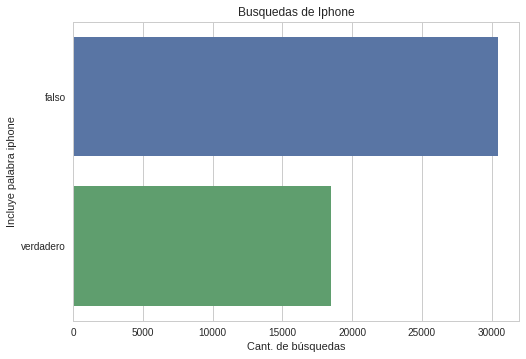

In [22]:
sns.set(style="whitegrid")
plotBusquedaIphone = sns.barplot(x=busquedaIncluyeIphone['cantidad'],y=busquedaIncluyeIphone.index,orient='horizontal')
plotBusquedaIphone.set(title="Busquedas de Iphone",xlabel="Cant. de búsquedas",ylabel="Incluye palabra iphone")

In [23]:
#De las búsquedas que no son iPhone veamos cuales son las más frecuentes:
busquedaNoIncluyeIphone = eventos.loc[eventos['search_term'].str.contains('iphone') == False, 'search_term'].value_counts().to_frame('cantidad')
busquedaNoIncluyeIphone = busquedaNoIncluyeIphone.loc[busquedaNoIncluyeIphone['cantidad'] >= 50,'cantidad'].to_frame()
busquedaNoIncluyeIphone = busquedaNoIncluyeIphone.reset_index()
busquedaNoIncluyeIphone.rename(index=str, columns={'index': "busqueda"},inplace=True)
busquedaNoIncluyeIphone.head(30)

,busqueda,cantidad
0,j7,950
1,motorola,852
2,j5,850
3,s7,763
4,s8,700
5,samsung,595
6,s6,480
7,j7 prime,436
8,moto g5,415
9,lg,367


/home/nico/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


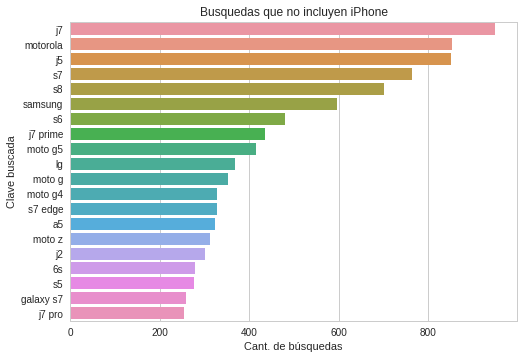

In [24]:
#Claves buscadas que no incluyen la palabra iPhone
plotBusquedaNoIphone = sns.barplot(x=busquedaNoIncluyeIphone['cantidad'],y=busquedaNoIncluyeIphone['busqueda'].head(20),orient='horizontal')
plotBusquedaNoIphone.set(title="Busquedas que no incluyen iPhone",xlabel="Cant. de búsquedas",ylabel="Clave buscada")

In [25]:
eventos.loc[:,['marca','modelo']].dropna().drop_duplicates().head(10)

,marca,modelo
2,iPhone,5s
4,Samsung,Galaxy S8
13,Motorola,Moto Z Play
22,iPhone,7 Plus
26,iPhone,6S
48,iPhone,4G
65,iPhone,4S
84,Samsung,Galaxy J5
89,iPhone,5c
104,iPhone,7


In [25]:
modelos = eventos.loc[:,['model','marca']].dropna().drop_duplicates()
modelos['model'] = modelos['model'].str.lower()
modelos.head()

,model,marca
2,iphone 5s,iPhone
4,samsung galaxy s8,Samsung
13,motorola moto z play,Motorola
22,iphone 7 plus,iPhone
26,iphone 6s,iPhone


Estudiamos el contenido de los registros distribuidos a lo largo del tiempo:
El rango temporal contenido en los registros ronda de: 2018-01-01 07:32:26 como fecha minima, y 2018-06-15 23:59:31 como fecha maxima.
De aqui extraemos la siguiente informacion:

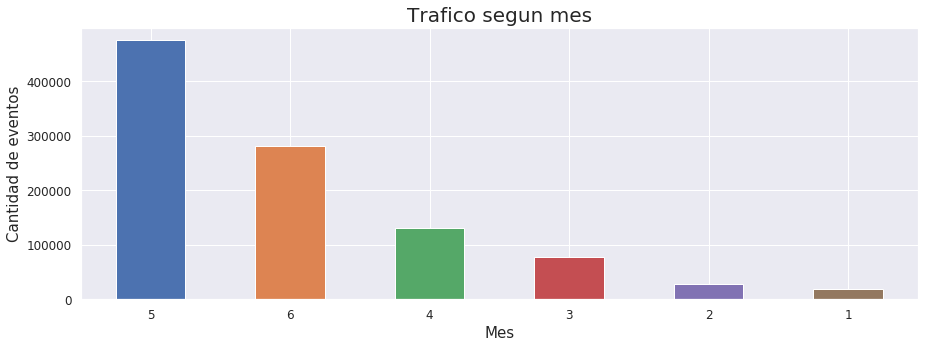

In [51]:
eventos['month'].value_counts().plot(kind='bar',figsize=(15,5),fontsize=12,rot=0)
plt.title("Trafico segun mes", size=20)
plt.xlabel("Mes",size=15)
plt.ylabel("Cantidad de eventos",size=15)
plt.show()

/home/nico/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


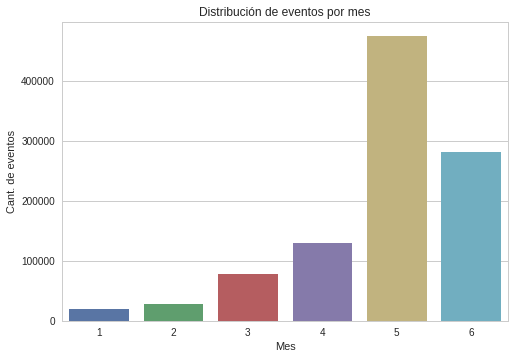

In [37]:
#Otra forma
cantidadEventosPorMes = eventos['month'].value_counts().to_frame('cantidad')
plotTraficoSegunMes = sns.barplot(x=cantidadEventosPorMes.index, y=cantidadEventosPorMes['cantidad'])
plotTraficoSegunMes.set(xlabel='Mes', ylabel='Cant. de eventos', title='Distribución de eventos por mes')

Observamos que el volumen de trafico en la pagina web de Trocaphone pareciera ir incrementando con el tiempo. Tambien observamos que el mes con el mayor trafico resulta ser Mayo, pero teniendo en cuenta que se tienen datos hasta mitad de Junio, nos arriesgamos a suponer que de tener los datos del mes completo, se mantendria la tendencia de alza.


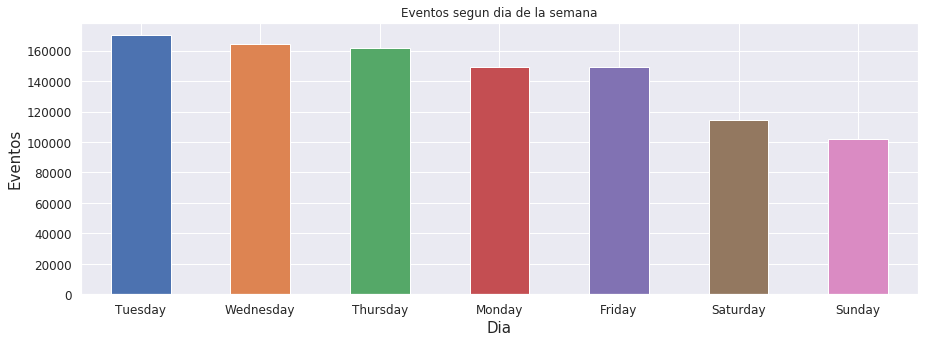

In [50]:
#Grafico Eventos segun dia de la semana
eventos.groupby('weekday')['event'].count().sort_values(ascending=False).plot(kind='bar',figsize=(15,5),fontsize=12,rot=0)
plt.title('Eventos segun dia de la semana')
plt.ylabel("Eventos", size=15)
plt.xlabel("Dia", size=15)
plt.show()

Observamos que la pagina posee un menor trafico durante los fines de semana

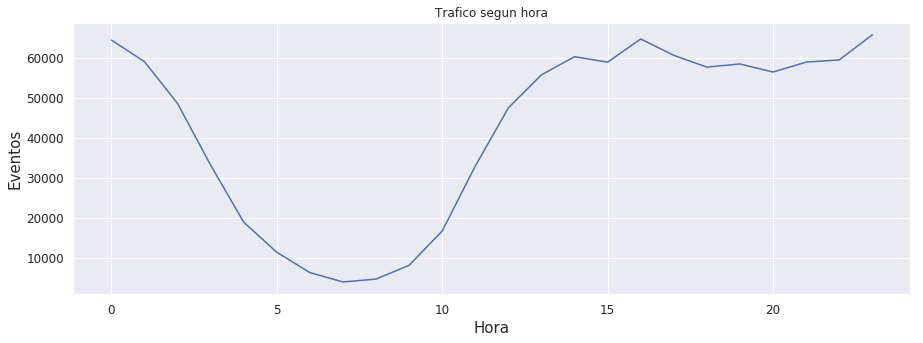

In [49]:
#Grafico Trafico Segun hora
eventos.groupby('hour')['hour'].count().plot(kind='line',figsize=(15,5),fontsize=12,rot=0)
plt.title('Trafico segun hora')
plt.ylabel("Eventos", size=15)
plt.xlabel("Hora", size=15)
plt.show()

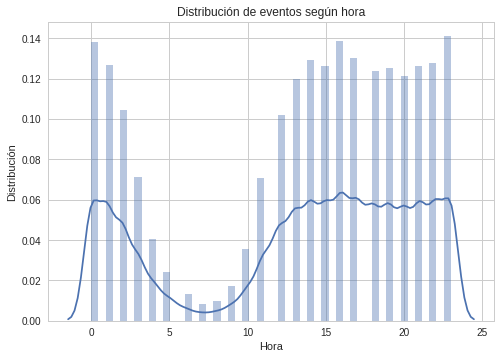

In [49]:
#Distribución de eventos según hora
plotEventosSegunHora = sns.distplot(eventos['hour'])
plotEventosSegunHora.set(title='Distribución de eventos según hora',xlabel='Hora',ylabel='Distribución')

El analisis realizado cumple con lo esperado, que es un decremento en el trafico a partir de las 00:00 hs, y hasta las 07:00 hs, debido a que es el horario de descanso


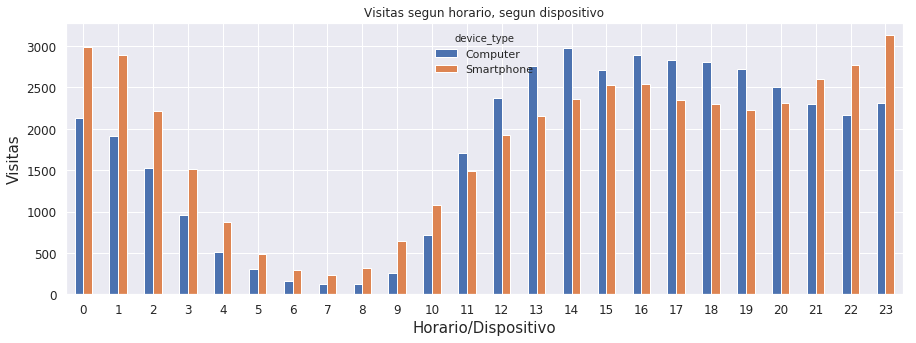

In [48]:
eventos.loc[(eventos['device_type']=='Computer')|(eventos['device_type']=='Smartphone')].groupby(['hour','device_type'])['hour'].count().unstack().plot(kind='bar',figsize=(15,5),fontsize=12,rot=0)
plt.title('Visitas segun horario, segun dispositivo')
plt.ylabel("Visitas", size=15)
plt.xlabel("Horario/Dispositivo", size=15)
plt.show()

De aqui observamos que el trafico segun dispositivo varia, nuestra suposicion es que en la franja horaria donde el trafico de computadoras es mayor (11:00-20:00 hs) los usuarios se encuentran en sus lugares de trabajo, donde es normal el uso de computadoras, mientras que en el resto del dia, calificable como "tiempo de ocio" los usuarios prefieren acceder desde la comodidad de sus dispositivos moviles


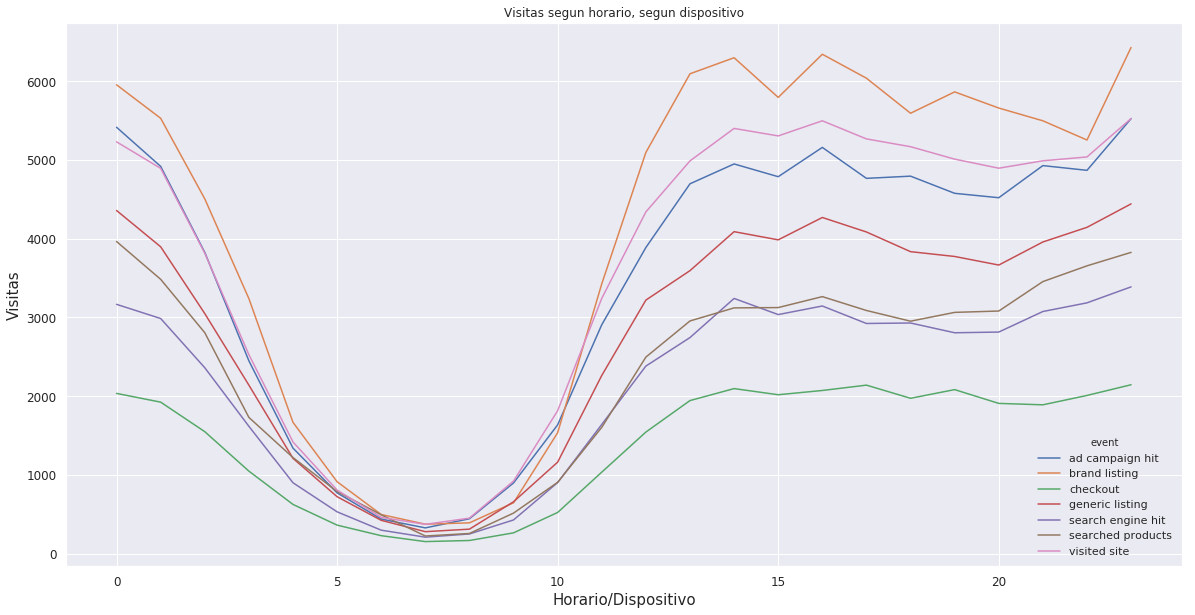

In [47]:
eventos.loc[(eventos['event']=='brand listing')|(eventos['event']=='visited site')|(eventos['event']=='ad campaign hit')|(eventos['event']=='generic listing')|(eventos['event']=='searched products')|(eventos['event']=='search engine hit')|(eventos['event']=='checkout')].groupby(['hour','event'])['hour'].count().unstack().plot(kind='line',figsize=(20,10),fontsize=12)
plt.title('Visitas segun horario, segun dispositivo')
plt.ylabel("Visitas", size=15)
plt.xlabel("Horario/Dispositivo", size=15)
plt.show()


Analisis segun caracteristicas de productos

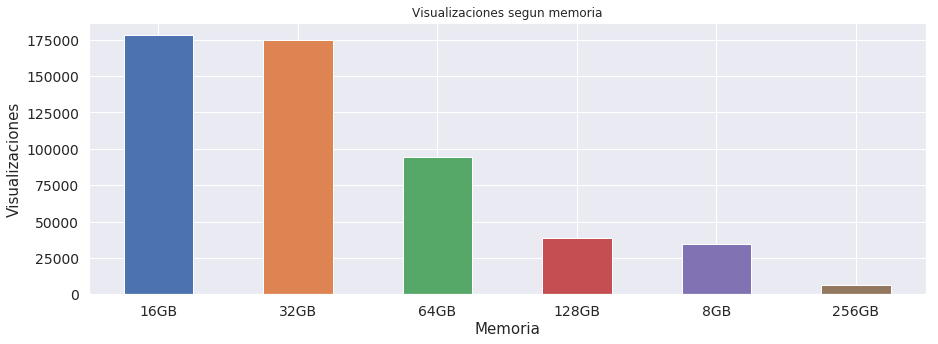

In [61]:
eventos.loc[eventos['event']=='viewed product']['storage'].value_counts().head(6).plot(kind='bar',figsize=(15,5),fontsize=14,rot=0)
plt.title('Visualizaciones segun memoria')
plt.ylabel("Visualizaciones", size=15)
plt.xlabel("Memoria", size=15)
plt.show()

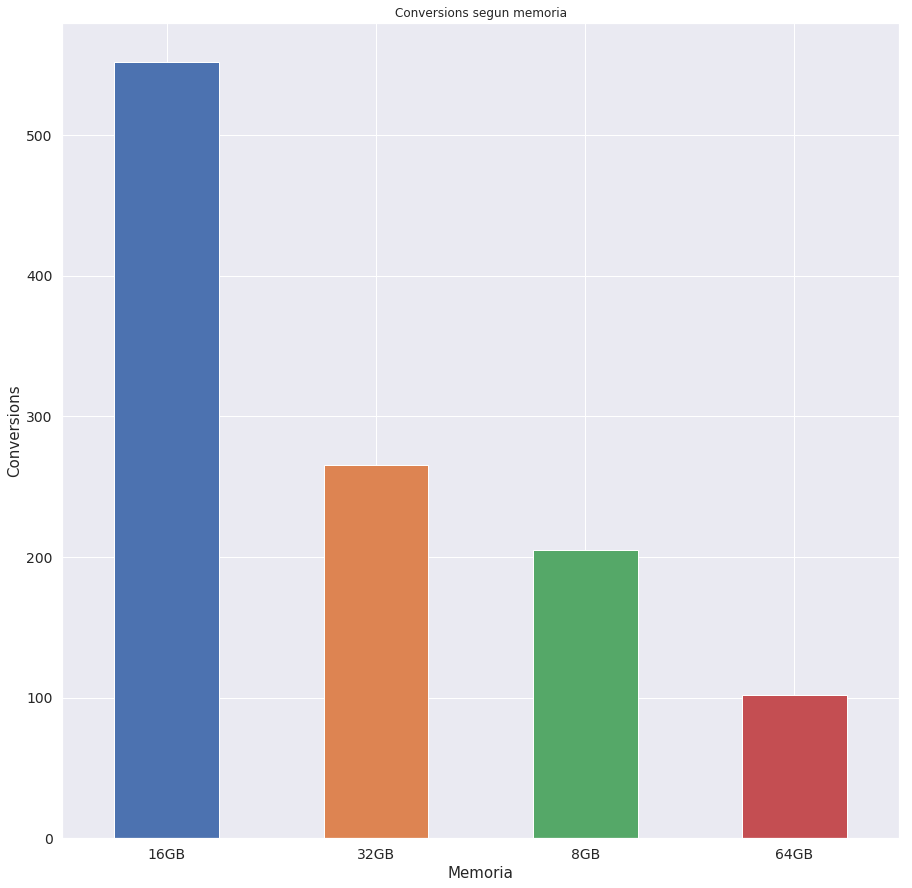

In [81]:
eventos.loc[eventos['event']=='conversion']['storage'].value_counts().head(4).plot(kind='bar',figsize=(15,15),fontsize=14,rot=0)
plt.title('Conversions segun memoria')
plt.ylabel("Conversions", size=15)
plt.xlabel("Memoria", size=15)
plt.show()


Compras/Visualizaciones segun Color

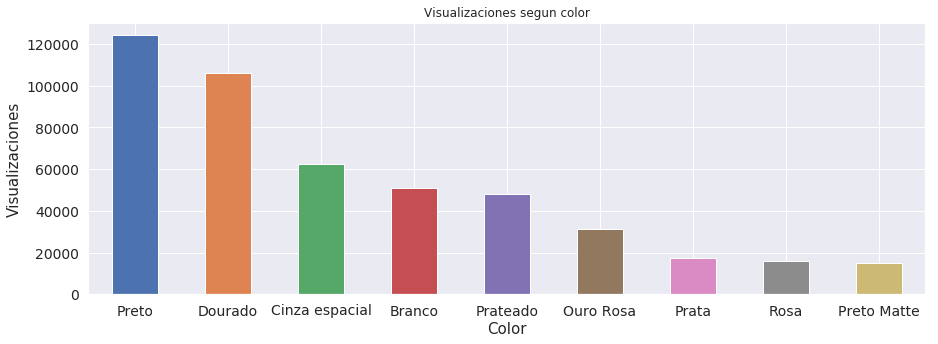

In [64]:
eventos.loc[eventos['event']=='viewed product']['color'].value_counts().head(9).plot(kind='bar',figsize=(15,5),fontsize=14,rot=0)
plt.title('Visualizaciones segun color')
plt.ylabel("Visualizaciones", size=15)
plt.xlabel("Color", size=15)
plt.show()

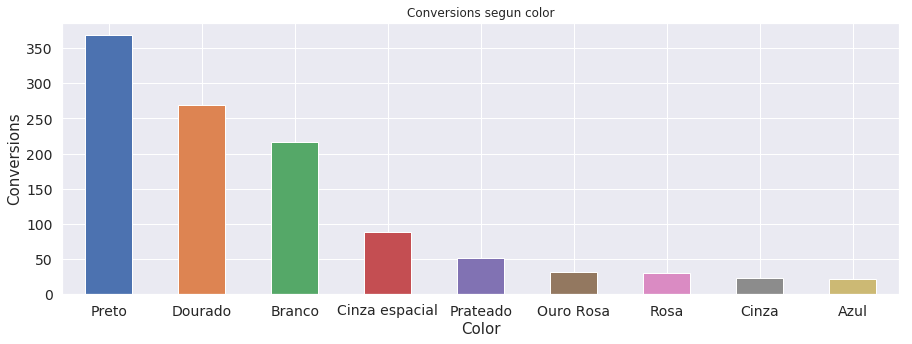

In [63]:
eventos.loc[eventos['event']=='conversion']['color'].value_counts().head(9).plot(kind='bar',figsize=(15,5),fontsize=14,rot=0)
plt.title('Conversions segun color')
plt.ylabel("Conversions", size=15)
plt.xlabel("Color", size=15)
plt.show()


Compras/Visualizaciones segun Condicion

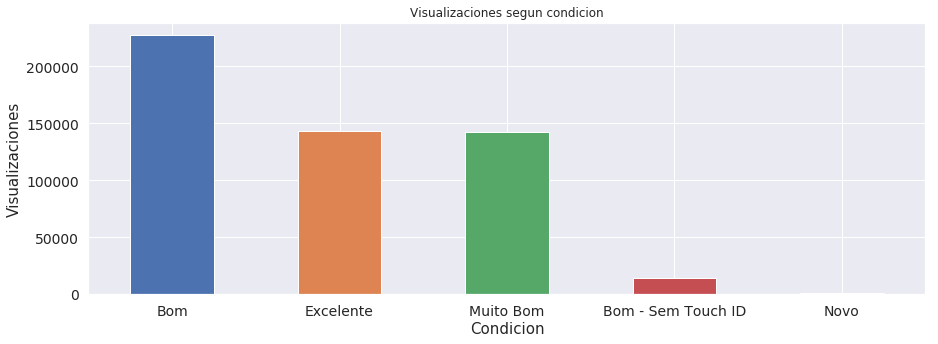

In [66]:
eventos.loc[eventos['event']=='viewed product']['condition'].value_counts().head(9).plot(kind='bar',figsize=(15,5),fontsize=14,rot=0)
plt.title('Visualizaciones segun condicion')
plt.ylabel("Visualizaciones", size=15)
plt.xlabel("Condicion", size=15)
plt.show()


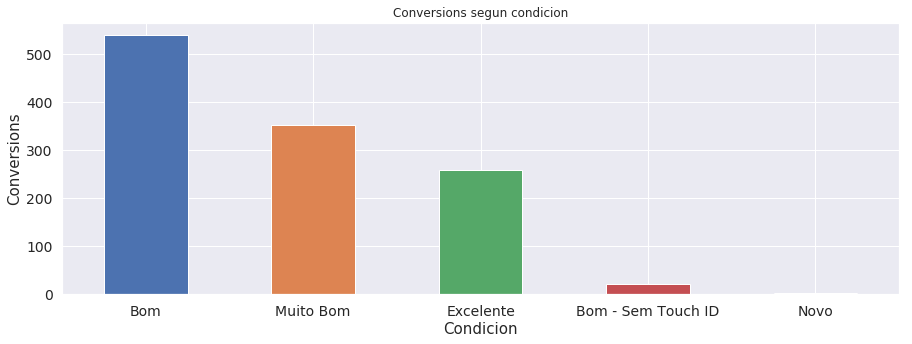

In [65]:
eventos.loc[eventos['event']=='conversion']['condition'].value_counts().head(9).plot(kind='bar',figsize=(15,5),fontsize=14,rot=0)
plt.title('Conversions segun condicion')
plt.ylabel("Conversions", size=15)
plt.xlabel("Condicion", size=15)
plt.show()


Compras/Visualizaciones segun Modelo

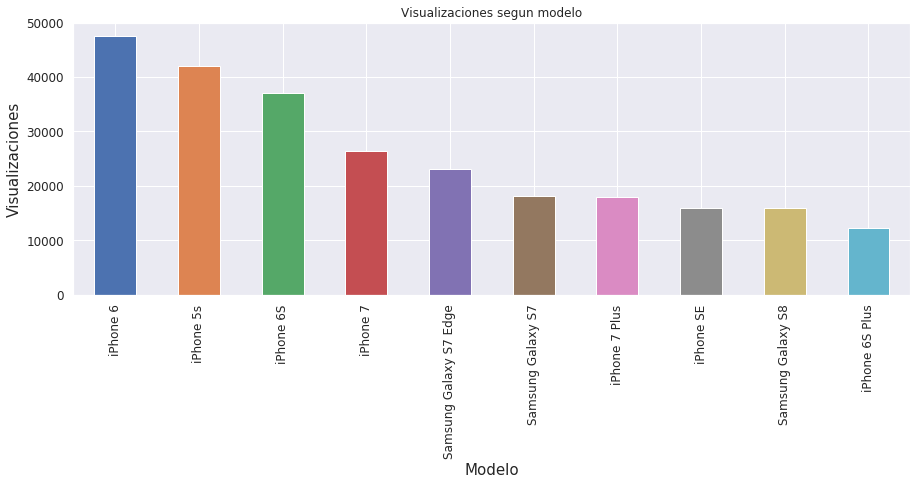

In [68]:
# Conversions segun Modelo
eventos.loc[eventos['event']=='viewed product'].groupby('model').count()['timestamp'].sort_values(ascending=False).head(10).plot(kind='bar',figsize=(15,5),fontsize=12)
plt.title('Visualizaciones segun modelo')
plt.ylabel("Visualizaciones", size=15)
plt.xlabel("Modelo", size=15)
plt.show()


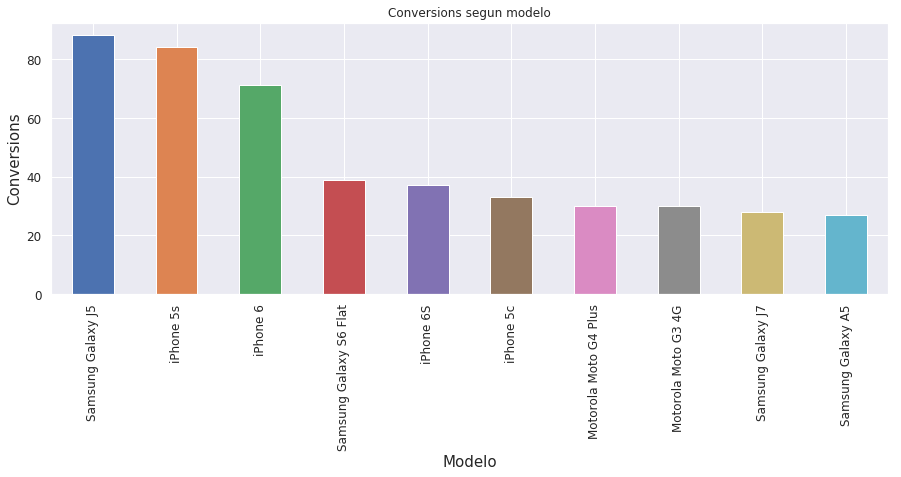

In [39]:
# Conversions segun Modelo
eventos.loc[eventos['event']=='conversion'].groupby('model').count()['timestamp'].sort_values(ascending=False).head(10).plot(kind='bar',figsize=(15,5),fontsize=12)
plt.title('Conversions segun modelo')
plt.ylabel("Conversions", size=15)
plt.xlabel("Modelo", size=15)
plt.show()


Compras/Visualizaciones segun Marca

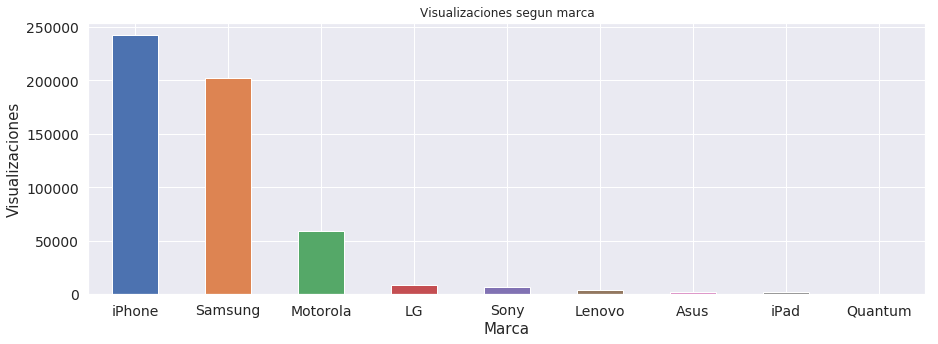

In [69]:
#Grafico Numero Eventos segun tupla Evento/Marca
eventos.loc[eventos['event']=='viewed product'].groupby('marca')['timestamp'].count().sort_values(ascending=False).plot(kind='bar',figsize=(15,5),fontsize=14,rot=0)
plt.title('Visualizaciones segun marca')
plt.ylabel("Visualizaciones", size=15)
plt.xlabel("Marca", size=15)
plt.show()

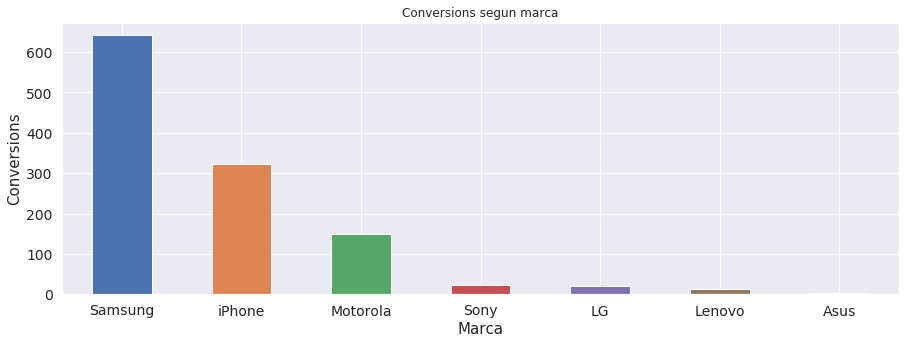

In [70]:
eventos.loc[eventos['event']=='conversion'].groupby('marca')['timestamp'].count().sort_values(ascending=False).plot(kind='bar',figsize=(15,5),fontsize=14,rot=0)
plt.title('Conversions segun marca')
plt.ylabel("Conversions", size=15)
plt.xlabel("Marca", size=15)
plt.show()

Analisis geografico

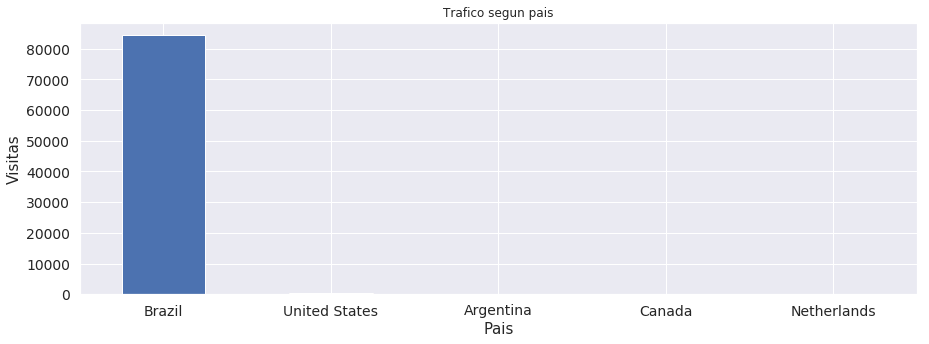

In [76]:
#Grafico eventos segun region
eventos.loc[~(eventos['country']=='Unknown')].groupby('country')['event'].count().sort_values(ascending=False).head(5).plot(kind='bar',figsize=(15,5),fontsize=14,rot=0)
plt.title('Trafico segun pais')
plt.ylabel("Visitas", size=15)
plt.xlabel("Pais", size=15)
plt.show()

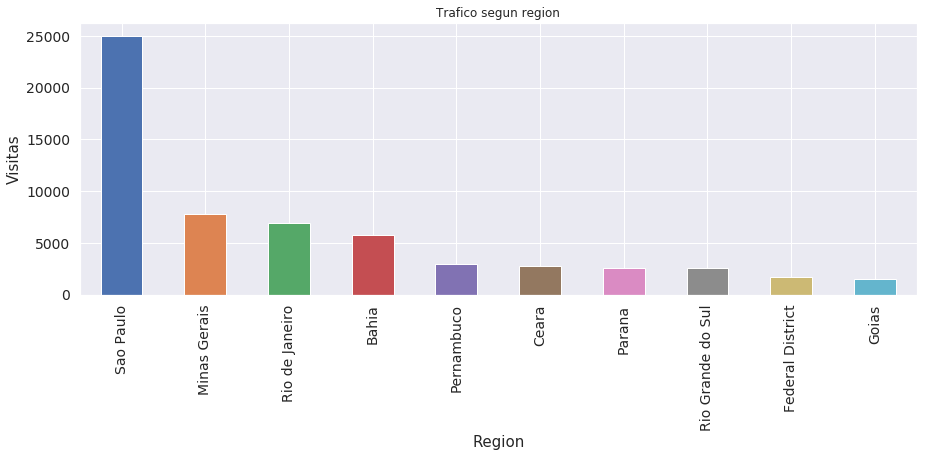

In [72]:
#Grafico eventos segun region
eventos.loc[~(eventos['region']=='Unknown')].groupby('region')['event'].count().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(15,5),fontsize=14)
plt.title('Trafico segun region')
plt.ylabel("Visitas", size=15)
plt.xlabel("Region", size=15)
plt.show()

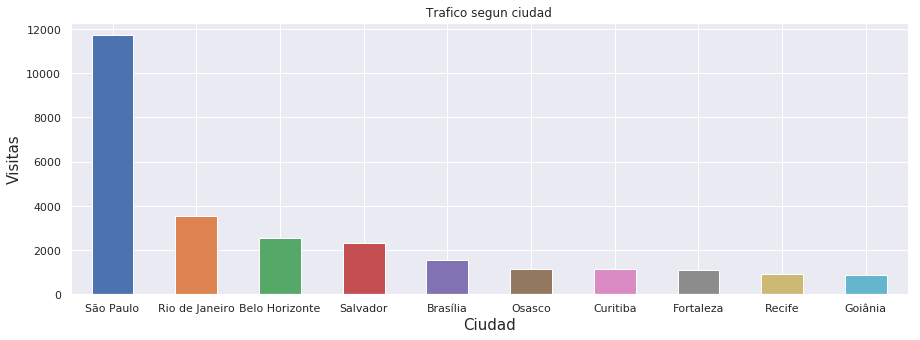

In [55]:
#Grafico eventos segun ciudad
eventos.loc[~(eventos['city']=='Unknown')].groupby('city')['event'].count().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(15,5),fontsize=11,rot=0)
plt.title('Trafico segun ciudad')
plt.ylabel("Visitas", size=15)
plt.xlabel("Ciudad", size=15)
plt.show()


Analisis campaña

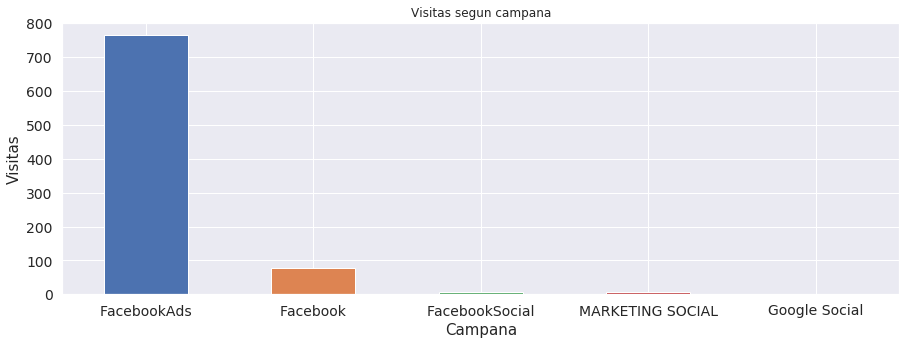

In [80]:
eventos.loc[eventos['event']=='ad campaign hit'].groupby('campaign_source').count().head(5)['timestamp'].sort_values(ascending=False).plot(kind='bar',figsize=(15,5),fontsize=14,rot=0)
plt.title('Visitas segun campana')
plt.ylabel("Visitas", size=15)
plt.xlabel("Campana", size=15)
plt.show()

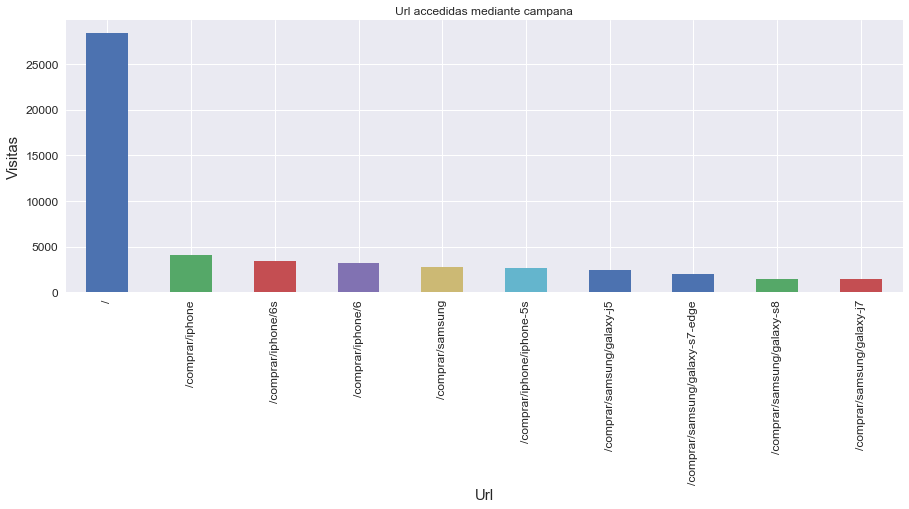

In [4]:
eventos.loc[eventos['event']=='ad campaign hit']['url'].value_counts().head(10).plot(kind='bar',figsize=(15,5),fontsize=12)
plt.title('Url accedidas mediante campana')
plt.ylabel("Visitas", size=15)
plt.xlabel("Url", size=15)
plt.show()

In [5]:
eventosTest.head(5)

,person,label
0,0566e9c1,0
1,6ec7ee77,0
2,abe7a2fb,0
3,34728364,0
4,87ed62de,0


In [6]:
eventosTotales.head(5)

,timestamp,event,person,Unnamed: 3,url,sku,model,condition,storage,color,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,5/18/2018 0:11,viewed product,4886f805,NaN,NaN,9288.0,Samsung Galaxy J7 Prime,Excelente,32GB,Dourado,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5/18/2018 0:11,viewed product,ad93850f,NaN,NaN,304.0,iPhone 5s,Muito Bom,32GB,Cinza espacial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5/18/2018 0:11,viewed product,0297fc1e,NaN,NaN,6888.0,iPhone 6S,Muito Bom,64GB,Prateado,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5/18/2018 0:11,viewed product,2d681dd8,NaN,NaN,11890.0,iPhone 7,Bom,128GB,Vermelho,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5/18/2018 0:11,viewed product,cccea85e,NaN,NaN,7517.0,LG G4 H818P,Excelente,32GB,Branco,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
eventosTotales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
timestamp                   1048575 non-null object
event                       1048575 non-null object
person                      1048575 non-null object
Unnamed: 3                  1 non-null object
url                         114700 non-null object
sku                         788094 non-null float64
model                       788094 non-null object
condition                   788094 non-null object
storage                     788094 non-null object
color                       788094 non-null object
skus                        75455 non-null object
search_term                 65838 non-null object
staticpage                  6601 non-null object
campaign_source             114789 non-null object
search_engine               63386 non-null object
channel                     0 non-null float64
new_vs_returning            0 non-null float64
city                        0 non-

In [8]:
import seaborn as sns # Visualizaciones más fancy
import numpy as np  # Librería para aplicar álgebra lineal
import pandas as pd # Para manejar los datos (datasets)

import matplotlib.pyplot as plt # Para las visualizaciones
#from sklearn import preprocessing # Para el procesador de los datos
from sklearn.preprocessing import Imputer # Para adoptar una estrategia para los missing values
from sklearn.preprocessing import LabelEncoder as Codificar # Para codificar variables categóricas
from sklearn.preprocessing import OneHotEncoder # Para pasar el LaberEncoder vector a OneHot matriz
from sklearn.preprocessing import MinMaxScaler # Para realizar el escalado en escala (0-1)
from sklearn.model_selection import train_test_split as Separar # Para dividir en los 2 conjuntos
from statsmodels.tools.eval_measures import rmse # Para calcular el error
from sklearn.metrics import confusion_matrix as CM # Para construir la matriz de confusión
from matplotlib.colors import ListedColormap as Colors # Para pintar las regiones en Clasificación

# Regresión Logística
La regresión logísitica es un modelo que puede predecir la probabilidad que tiene una variable binaria (que puede aceptar 2 valores) de pertenecer a una clase o a otra. Es por tanto un método utilizado para la clasificación categórica de variables, especialmente útil por su simplicidad e interpretabilidad

## Escenario del problema
Queremos encontrar la relación que existe entre el evento de compra y el color.

In [79]:

eventosImportantes = eventosTotales[['storage', 'color', 'event']] # Solo nos interesa esta información

eventosImportantes['color']=eventosImportantes['color'].astype('category')
eventosImportantes['color']=eventosImportantes['color'].cat.codes
eventosImportantes['color']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


0          28
1          20
2          37
3          61
4           8
5          -1
6          28
7          20
8          35
9          -1
10         33
11         50
12         37
13         37
14         -1
15          8
16          8
17         38
18         -1
19         38
20         -1
21         38
22         37
23         34
24          1
25         -1
26         38
27         51
28         26
29         -1
           ..
1048545    51
1048546    34
1048547    38
1048548    38
1048549    38
1048550    38
1048551    38
1048552    38
1048553    20
1048554    37
1048555    38
1048556     8
1048557    -1
1048558    -1
1048559    28
1048560    28
1048561    38
1048562    38
1048563    28
1048564    20
1048565    53
1048566    58
1048567    -1
1048568     8
1048569    -1
1048570    20
1048571    28
1048572    34
1048573    34
1048574    34
Name: color, Length: 1048575, dtype: int8

In [80]:
eventosImportantes['storage']=eventosImportantes['storage'].astype('category')
eventosImportantes['storage']=eventosImportantes['storage'].cat.codes

eventosImportantes['event']=eventosImportantes['event'].apply(lambda x: '1' if x == 'conversion' else 0 )
eventosImportantes

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,storage,color,event
0,3,28,0
1,3,20,0
2,6,37,0
3,0,61,0
4,3,8,0
5,-1,-1,0
6,1,28,0
7,0,20,0
8,3,35,0
9,-1,-1,0


In [81]:
# 3. Crear los conjuntos
# 3.1. Crear variables predictoras y variable respuesta
X = eventosImportantes[['storage', 'color']].values
y = eventosImportantes['event'].values
# 3.2. Utilizar el Separador
X_train, X_test, y_train, y_test = Separar(X, y, test_size=0.25)
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (786431, 2)
X_test:  (262144, 2)
y_train:  (786431,)
y_test:  (262144,)


In [82]:
# 4. Escalar
escalador = MinMaxScaler()
sc_X_train = escalador.fit_transform(X_train)
sc_X_test  = escalador.transform(X_test)
eventosImportantes.info()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
storage    1048575 non-null int8
color      1048575 non-null int8
event      1048575 non-null object
dtypes: int8(2), object(1)
memory usage: 10.0+ MB


In [83]:
# 5. Crear y ajustar el modelo
eventosImportantes['storage']=eventosImportantes['storage'].astype(np.int64)
eventosImportantes['color']=eventosImportantes['color'].astype(np.int64)

from sklearn.linear_model import LogisticRegression as LR
clasificador_log = LR()
clasificador_log.fit(sc_X_train, y_train.astype(int))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [84]:
# 6. Hacer las predicciones
y_pred = clasificador_log.predict(sc_X_test)

In [85]:
print(X_train.shape)
print(sc_X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(sc_X_test.shape)
print(y_test.shape)

(786431, 2)
(786431, 2)
(786431,)
(262144, 2)
(262144, 2)
(262144,)


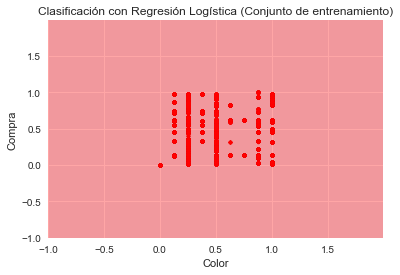

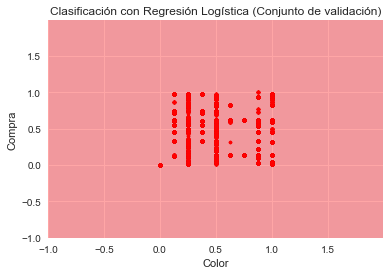

In [88]:
# 7. Analizar los resultados

# 7.1. Matrix de Confusión
cm = CM(y_test.astype(int), y_pred)

# 7.2.1 Gráfico de regiones y clasifiación (Conjunto de entrenamiento)
X_set, y_set = sc_X_train, y_train
# 7.2.1.1. Creamos cuadrícula (grid) para hacer las regiones (tenemos que predecir todo el plano)
planoX, planoY = (np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                  np.arange(start=X_set[:,1].min()-1, stop=X_set[:,0].max()+1, step=0.01))
X1, X2 = np.meshgrid(planoX, planoY)

limite = clasificador_log.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
plt.contourf(X1, X2, limite, alpha = 0.35, cmap = Colors(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# 7.2.1.2. Pintamos las predicciones
for i,j in enumerate(np.unique(y_set.astype(int))):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = Colors(('red', 'green'))(i), label = j, s=10)
plt.title('Clasificación con Regresión Logística (Conjunto de entrenamiento)')
plt.xlabel('Color')
plt.ylabel('Compra')
plt.show()

# 7.2.2 Gráfico de regiones y clasifiación (Conjunto de validación)
X_set, y_set = sc_X_test, y_test.astype(int)
# 7.2.2.1. Creamos cuadrícula (grid) para hacer las regiones (tenemos que predecir todo el plano)
planoX, planoY = (np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                  np.arange(start=X_set[:,1].min()-1, stop=X_set[:,0].max()+1, step=0.01))
X1, X2 = np.meshgrid(planoX, planoY)

limite = clasificador_log.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
plt.contourf(X1, X2, limite, alpha = 0.35, cmap = Colors(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# 7.2.2.2. Pintamos las predicciones
for i,j in enumerate(np.unique(y_set.astype(int))):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = Colors(('red', 'green'))(i), label = j, s=10)
plt.title('Clasificación con Regresión Logística (Conjunto de validación)')
plt.xlabel('Color')
plt.ylabel('Compra')
plt.show()

Damos cuenta que la Regresión Logística no puede separar las probabilidades de compra de no-compra. está overfitteando.

# SVM - Support Vector Machines
Los SVM utilizan la misma técnica de función de mapeo para llevar los datos a un espacio de mayor dimensión donde los datos sean linealmente separables por un plano, que divida nuestros datos por categorías.

In [104]:
eventosImportantes = eventosTotales[['storage', 'color', 'event']] # Solo nos interesa esta información

eventosImportantes['color']=eventosImportantes['color'].astype('category')
eventosImportantes['color']=eventosImportantes['color'].cat.codes
eventosImportantes['storage']=eventosImportantes['storage'].astype('category')
eventosImportantes['storage']=eventosImportantes['storage'].cat.codes

eventosImportantes['event']=eventosImportantes['event'].apply(lambda x: '1' if x == 'conversion' else 0 )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [105]:
# 3. Crear los conjuntos
# 3.1. Crear variables predictoras y variable respuesta
X = eventosImportantes[['storage', 'color']].values
y = eventosImportantes['event'].values
# 3.2. Utilizar el Separador
X_train, X_test, y_train, y_test = Separar(X, y, test_size=0.25)
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (786431, 2)
X_test:  (262144, 2)
y_train:  (786431,)
y_test:  (262144,)


In [106]:
# 4. Escalar
escalador = MinMaxScaler()
sc_X_train = escalador.fit_transform(X_train)
sc_X_test  = escalador.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [110]:
# 5. Crear y ajustar el modelo
from sklearn.svm import SVC
clasificador_SVM = SVC(kernel='rbf')
clasificador_SVM.fit(sc_X_train, y_train.astype(int))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [111]:
# 6. Hacer las predicciones
y_pred = clasificador_SVM.predict(sc_X_test)

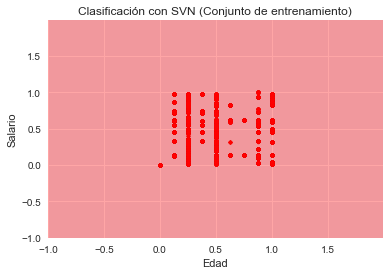

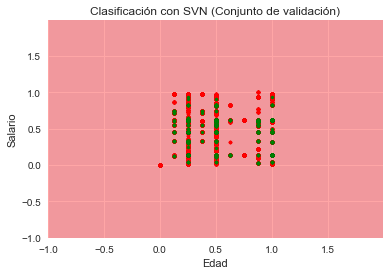

In [115]:
# 7. Analizar los resultados

# 7.1. Matrix de Confusión
cm = CM(y_test.astype(int), y_pred)

# 7.2.1 Gráfico de regiones y clasifiación (Conjunto de entrenamiento)
X_set, y_set = sc_X_train, y_train
# 7.2.1.1. Creamos cuadrícula (grid) para hacer las regiones (tenemos que predecir todo el plano)
planoX, planoY = (np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                  np.arange(start=X_set[:,1].min()-1, stop=X_set[:,0].max()+1, step=0.01))
X1, X2 = np.meshgrid(planoX, planoY)

limite = clasificador_SVM.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
plt.contourf(X1, X2, limite, alpha = 0.35, cmap = Colors(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# 7.2.1.2. Pintamos las predicciones
for i,j in enumerate(np.unique(y_set.astype(int))):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = Colors(('red', 'green'))(i), label = j, s=10)
plt.title('Clasificación con SVN (Conjunto de entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.show()

# 7.2.2 Gráfico de regiones y clasifiación (Conjunto de validación)
X_set, y_set = sc_X_test, y_test.astype(int)
# 7.2.2.1. Creamos cuadrícula (grid) para hacer las regiones (tenemos que predecir todo el plano)
planoX, planoY = (np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                  np.arange(start=X_set[:,1].min()-1, stop=X_set[:,0].max()+1, step=0.01))
X1, X2 = np.meshgrid(planoX, planoY)

limite = clasificador_SVM.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
plt.contourf(X1, X2, limite, alpha = 0.35, cmap = Colors(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# 7.2.2.2. Pintamos las predicciones
for i,j in enumerate(np.unique(y_set.astype(int))):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = Colors(('red', 'green'))(i), label = j, s=10)
plt.title('Clasificación con SVN (Conjunto de validación)')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.show()

## kNN - k Vecinos más cercanos
El algortimo kNN categoriza los puntos en función de la clase a la que pertenecen sus vecinos más cercanos. Toma una distancia (lineal por ejemplo) a un conjunto de vecinos en un radio delimitado, y compara cual es la clase predominante para convertirse en uno más de esa clase

In [116]:
eventosImportantes = eventosTotales[['storage', 'color', 'event']] # Solo nos interesa esta información

eventosImportantes['color']=eventosImportantes['color'].astype('category')
eventosImportantes['color']=eventosImportantes['color'].cat.codes
eventosImportantes['storage']=eventosImportantes['storage'].astype('category')
eventosImportantes['storage']=eventosImportantes['storage'].cat.codes

eventosImportantes['event']=eventosImportantes['event'].apply(lambda x: '1' if x == 'conversion' else 0 )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [117]:
# 3. Crear los conjuntos
# 3.1. Crear variables predictoras y variable respuesta
X = eventosImportantes[['storage', 'color']].values
y = eventosImportantes['event'].values
# 3.2. Utilizar el Separador
X_train, X_test, y_train, y_test = Separar(X, y, test_size=0.25)

In [118]:
# 4. Escalar
escalador = MinMaxScaler()
sc_X_train = escalador.fit_transform(X_train)
sc_X_test  = escalador.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [119]:
# 5. Crear y ajustar el modelo
from sklearn.neighbors import KNeighborsClassifier as KNN
clasificador_knn = KNN()
clasificador_knn2 = KNN()
clasificador_knn.fit(X_train, y_train.astype(int))
clasificador_knn2.fit(sc_X_train, y_train.astype(int))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [120]:
# 6. Hacer las predicciones
y_pred = clasificador_knn.predict(X_test)
y_pred2 = clasificador_knn2.predict(sc_X_test)

In [121]:
y_pred == y_pred2

array([ True,  True,  True, ...,  True,  True,  True])

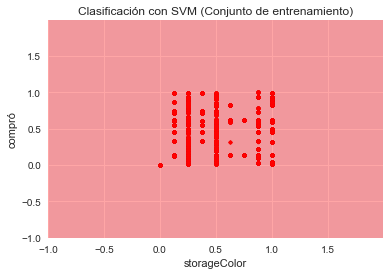

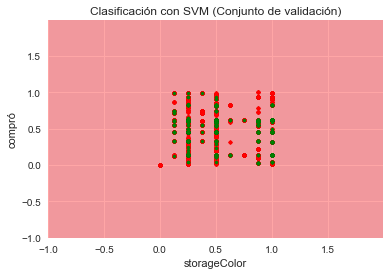

In [122]:
cm = CM(y_test.astype(int), y_pred)

# 7.2.1 Gráfico de regiones y clasifiación (Conjunto de entrenamiento)
X_set, y_set = sc_X_train, y_train
# 7.2.1.1. Creamos cuadrícula (grid) para hacer las regiones (tenemos que predecir todo el plano)
planoX, planoY = (np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                  np.arange(start=X_set[:,1].min()-1, stop=X_set[:,0].max()+1, step=0.01))
X1, X2 = np.meshgrid(planoX, planoY)

limite = clasificador_knn2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
plt.contourf(X1, X2, limite, alpha = 0.35, cmap = Colors(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# 7.2.1.2. Pintamos las predicciones
for i,j in enumerate(np.unique(y_set.astype(int))):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = Colors(('red', 'green'))(i), label = j, s=10)
plt.title('Clasificación con SVM (Conjunto de entrenamiento)')
plt.xlabel('storageColor')
plt.ylabel('compró')
plt.show()

# 7.2.2 Gráfico de regiones y clasifiación (Conjunto de validación)
X_set, y_set = sc_X_test, y_test.astype(int)
# 7.2.2.1. Creamos cuadrícula (grid) para hacer las regiones (tenemos que predecir todo el plano)
planoX, planoY = (np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                  np.arange(start=X_set[:,1].min()-1, stop=X_set[:,0].max()+1, step=0.01))
X1, X2 = np.meshgrid(planoX, planoY)

limite = clasificador_knn2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
plt.contourf(X1, X2, limite, alpha = 0.35, cmap = Colors(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# 7.2.2.2. Pintamos las predicciones
for i,j in enumerate(np.unique(y_set).astype(int)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = Colors(('red', 'green'))(i), label = j, s=10)
plt.title('Clasificación con SVM (Conjunto de validación)')
plt.xlabel('storageColor')
plt.ylabel('compró')
plt.show()